In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
import helper # my function that i added

In [2]:
colors = ["#FF0B04", "#F1BE48",
           "#B9975B", "#8B5B29",
           "#524727",
         ]
sns.set_palette(sns.color_palette(colors))
sns.color_palette()

[(1.0, 0.043137254901960784, 0.01568627450980392),
 (0.9450980392156862, 0.7450980392156863, 0.2823529411764706),
 (0.7254901960784313, 0.592156862745098, 0.3568627450980392),
 (0.5450980392156862, 0.3568627450980392, 0.1607843137254902),
 (0.3215686274509804, 0.2784313725490196, 0.15294117647058825)]

In [3]:
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0,low_memory = True)
location = pd.read_csv('Ames_Real_Estate_Data.csv', low_memory=True)

# train, test = helper.stratified_split(housing,'Neighborhood')

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
location.shape

(22213, 91)

In [5]:
drop_cols = ['Source','Date']
location = location.drop(drop_cols, axis = 1)
location.shape


(22213, 89)

why was there a difference in length of columns that have the same id column

In [11]:
PID_list = list(housing.PID.unique())

In [12]:
location[location['MapRefNo'].isin(PID_list)]

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,...,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,NmbrBRs
113,526350040,526350040,0,0,3109 GROVE AVE,RH,NaN,NaN,NaN,RESIDENTIAL,...,NaN,Deed,3109.0,NaN,GROVE,AVE,NaN,NaN,NaN,2.0
118,526351010,526351010,0,0,630 RIVER OAK DR,RL,NaN,NaN,NaN,RESIDENTIAL,...,NaN,Deed,630.0,NaN,RIVER OAK,DR,NaN,NaN,NaN,3.0
120,526351030,526351030,0,0,620 RIVER OAK DR,RL,NaN,NaN,NaN,RESIDENTIAL,...,NaN,Deed,620.0,NaN,RIVER OAK,DR,NaN,NaN,NaN,3.0
127,526351100,526351100,0,0,3010 GROVE AVE,RL,NaN,NaN,NaN,RESIDENTIAL,...,Normal,Deed,3010.0,NaN,GROVE,AVE,NaN,NaN,NaN,4.0
272,526301100,526301100,0,0,3126 NORTHWOOD DR,RL,NaN,NaN,NaN,RESIDENTIAL,...,NaN,Deed,3126.0,NaN,NORTHWOOD,DR,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22097,923275140,923275140,0,0,3803 MINNETONKA AVE,RL,NaN,NaN,NaN,RESIDENTIAL,...,NaN,Deed,3803,NaN,MINNETONKA,AVE,NaN,NaN,NaN,3.0
22103,923275200,923275200,0,0,3827 MINNETONKA AVE,RL,NaN,NaN,NaN,RESIDENTIAL,...,Normal,Deed,3827,NaN,MINNETONKA,AVE,NaN,NaN,NaN,2.0
22106,923276030,923276030,0,0,615 GARDEN RD,RL,NaN,O-E,NaN,RESIDENTIAL,...,Normal,Deed,615,NaN,GARDEN,RD,NaN,NaN,NaN,2.0
22113,923276100,923276100,0,0,719 GARDEN RD,RL,NaN,O-E,NaN,RESIDENTIAL,...,Normal,Deed,719,NaN,GARDEN,RD,NaN,NaN,NaN,2.0


In [16]:
loc_map_val = location[location['MapRefNo'].isin(PID_list)].MapRefNo.value_counts()

In [34]:
loc_map_val_index = list(loc_map_val[loc_map_val>1].index)

In [38]:
for test in loc_map_val_index:
    print(test)
    print(location[location['MapRefNo']==test].head())

528106020
       MapRefNo   GeoRefNo  Tier  Range          Prop_Addr ZngCdPr ZngCdSc  \
1949  528106020  528106020     0      0  3324 STOCKBURY ST   FS-RL     NaN   
1950  528106020  528106020     0      0  3324 STOCKBURY ST   FS-RL     NaN   
1951  528106020  528106020     0      0  3324 STOCKBURY ST   FS-RL     NaN   

     ZngOLPr ZngOLSc    ClassPr_S  ... SaleCond ParclRel  PA-Nmbr  PA-PreD  \
1949     NaN     NaN  RESIDENTIAL  ...   Normal     Deed   3324.0      NaN   
1950     NaN     NaN  RESIDENTIAL  ...   Normal     Deed   3324.0      NaN   
1951     NaN     NaN  RESIDENTIAL  ...  Abnorml     Deed   3324.0      NaN   

        PA-Strt PA-StSfx PA-PostD  PA-UnTyp PA-UntNo NmbrBRs  
1949  STOCKBURY       ST      NaN       NaN      NaN     2.0  
1950  STOCKBURY       ST      NaN       NaN      NaN     2.0  
1951  STOCKBURY       ST      NaN       NaN      NaN     2.0  

[3 rows x 89 columns]
923226300
        MapRefNo   GeoRefNo  Tier  Range      Prop_Addr ZngCdPr ZngCdSc  \
2057

[2 rows x 89 columns]
528439040
       MapRefNo   GeoRefNo  Tier  Range          Prop_Addr ZngCdPr ZngCdSc  \
3001  528439040  528439040     0      0  2607 YORKSHIRE ST   FS-RL     NaN   
3002  528439040  528439040     0      0  2607 YORKSHIRE ST   FS-RL     NaN   

     ZngOLPr ZngOLSc    ClassPr_S  ... SaleCond ParclRel  PA-Nmbr  PA-PreD  \
3001     NaN     NaN  RESIDENTIAL  ...   Normal     Deed   2607.0      NaN   
3002     NaN     NaN  RESIDENTIAL  ...   Normal     Deed   2607.0      NaN   

        PA-Strt PA-StSfx PA-PostD  PA-UnTyp PA-UntNo NmbrBRs  
3001  YORKSHIRE       ST      NaN       NaN      NaN     3.0  
3002  YORKSHIRE       ST      NaN       NaN      NaN     3.0  

[2 rows x 89 columns]
534455030
       MapRefNo   GeoRefNo  Tier  Range     Prop_Addr ZngCdPr ZngCdSc ZngOLPr  \
6278  534455030  534455030     0      0  1410 16TH ST      RL     NaN     NaN   
6279  534455030  534455030     0      0  1410 16TH ST      RL     NaN     NaN   

     ZngOLSc    ClassPr_S  ... S

[2 rows x 89 columns]


In [14]:
location[location['GeoRefNo'].isin(PID_list)]

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,...,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,NmbrBRs
113,526350040,526350040,0,0,3109 GROVE AVE,RH,NaN,NaN,NaN,RESIDENTIAL,...,NaN,Deed,3109.0,NaN,GROVE,AVE,NaN,NaN,NaN,2.0
118,526351010,526351010,0,0,630 RIVER OAK DR,RL,NaN,NaN,NaN,RESIDENTIAL,...,NaN,Deed,630.0,NaN,RIVER OAK,DR,NaN,NaN,NaN,3.0
120,526351030,526351030,0,0,620 RIVER OAK DR,RL,NaN,NaN,NaN,RESIDENTIAL,...,NaN,Deed,620.0,NaN,RIVER OAK,DR,NaN,NaN,NaN,3.0
127,526351100,526351100,0,0,3010 GROVE AVE,RL,NaN,NaN,NaN,RESIDENTIAL,...,Normal,Deed,3010.0,NaN,GROVE,AVE,NaN,NaN,NaN,4.0
272,526301100,526301100,0,0,3126 NORTHWOOD DR,RL,NaN,NaN,NaN,RESIDENTIAL,...,NaN,Deed,3126.0,NaN,NORTHWOOD,DR,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22097,923275140,923275140,0,0,3803 MINNETONKA AVE,RL,NaN,NaN,NaN,RESIDENTIAL,...,NaN,Deed,3803,NaN,MINNETONKA,AVE,NaN,NaN,NaN,3.0
22103,923275200,923275200,0,0,3827 MINNETONKA AVE,RL,NaN,NaN,NaN,RESIDENTIAL,...,Normal,Deed,3827,NaN,MINNETONKA,AVE,NaN,NaN,NaN,2.0
22106,923276030,923276030,0,0,615 GARDEN RD,RL,NaN,O-E,NaN,RESIDENTIAL,...,Normal,Deed,615,NaN,GARDEN,RD,NaN,NaN,NaN,2.0
22113,923276100,923276100,0,0,719 GARDEN RD,RL,NaN,O-E,NaN,RESIDENTIAL,...,Normal,Deed,719,NaN,GARDEN,RD,NaN,NaN,NaN,2.0


In [13]:
len(PID_list)

2579

looking at columns of the location column. not a lot of things that are useful.

In [5]:
categorical_features = location.select_dtypes(include = ["object"]).columns
numerical_features = location.select_dtypes(exclude = ["object"]).columns

In [6]:
categorical_features

Index(['Prop_Addr', 'ZngCdPr', 'ZngCdSc', 'ZngOLPr', 'ZngOLSc', 'ClassPr_S',
       'ClassSc_S', 'Legal_Pr', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_City',
       'MA_State', 'Inst1_No', 'Inst1TPr', 'ValType', 'X1TPr_D', 'X1TSc_D',
       'X2TSc_D', 'X1TPr_S', 'X1TSc_S', 'X2TSc_S', 'Neighborhood', 'ParType',
       'BldgType', 'HouseStyle', 'Foundation', 'RoofMatl', 'Ext1', 'Ext2',
       'MasVnrType', 'Heating', 'Central Air', 'GarageType', 'SaleType',
       'SaleCond', 'ParclRel', 'PA-Nmbr', 'PA-PreD', 'PA-Strt', 'PA-StSfx',
       'PA-UnTyp', 'PA-UntNo', 'Date', 'Source'],
      dtype='object')

In [7]:
numerical_features

Index(['MapRefNo', 'GeoRefNo', 'Tier', 'Range', 'SchD_S', 'TxD_S', 'MA_Line2',
       'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo', 'Inst1_Yr', 'Inst1_Mo',
       'LndAc_S', 'ImpAc_S', 'OthAc_S', 'TtlVal_AsrYr', 'X2TPr_D', 'X2TPr_S',
       'LndAcX1S', 'ImpAcX1S', 'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S',
       'MilVal_S', 'AcreX_S1', 'AcreGr', 'AcreNt_S', 'LotArea', 'BldgNo_S',
       'DwlgNo_S', 'YrBuilt', 'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces',
       'PoolArea', 'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY',
       'MoSold_MM', 'SalePrice', 'PA-PostD', 'NmbrBRs'],
      dtype='object')

Prop_Addr has 21865 unique values
 Number of NA's 20
ZngCdPr has 27 unique values
 Number of NA's 106
ZngCdSc has 10 unique values
 Number of NA's 22187
ZngOLPr has 10 unique values
 Number of NA's 20243


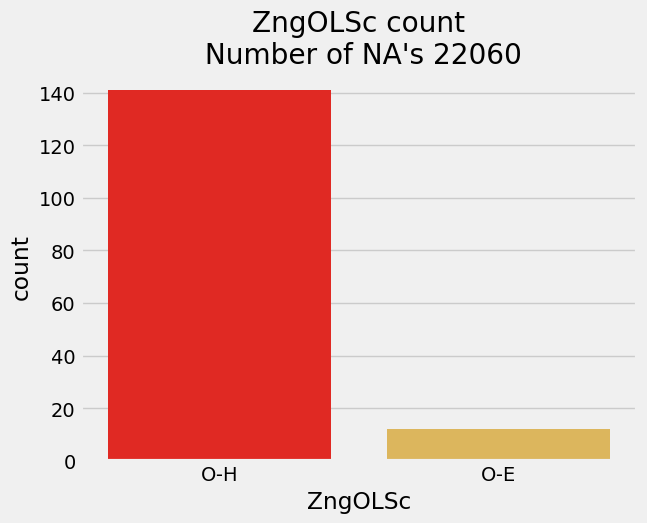

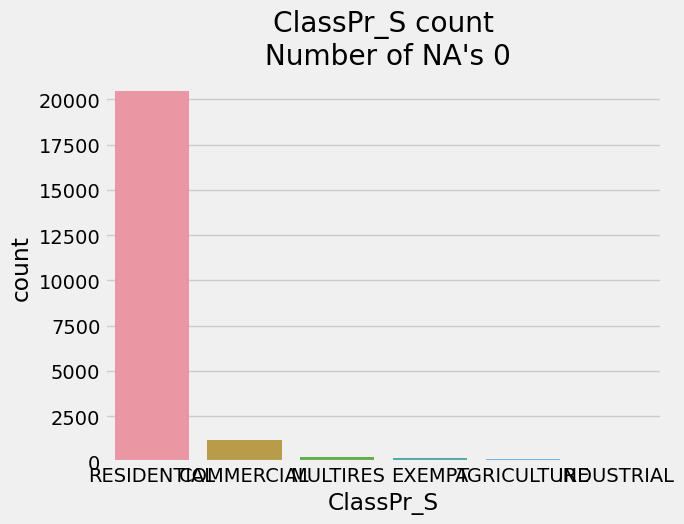

ClassSc_S has 157 unique values
 Number of NA's 0
Legal_Pr has 21049 unique values
 Number of NA's 0
MA_Ownr1 has 12542 unique values
 Number of NA's 0
MA_Ownr2 has 2458 unique values
 Number of NA's 19337
MA_Line1 has 11446 unique values
 Number of NA's 14
MA_City has 453 unique values
 Number of NA's 14
MA_State has 50 unique values
 Number of NA's 14
Inst1_No has 13627 unique values
 Number of NA's 1857
Inst1TPr has 27 unique values
 Number of NA's 2677


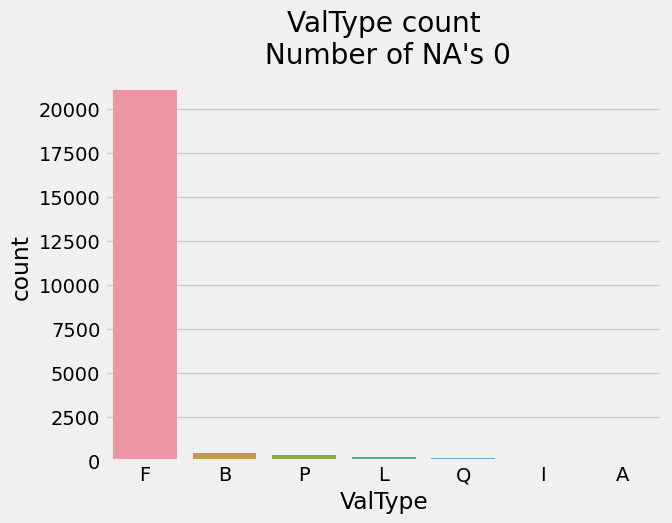

X1TPr_D has 31 unique values
 Number of NA's 21519
X1TSc_D has 30 unique values
 Number of NA's 21519


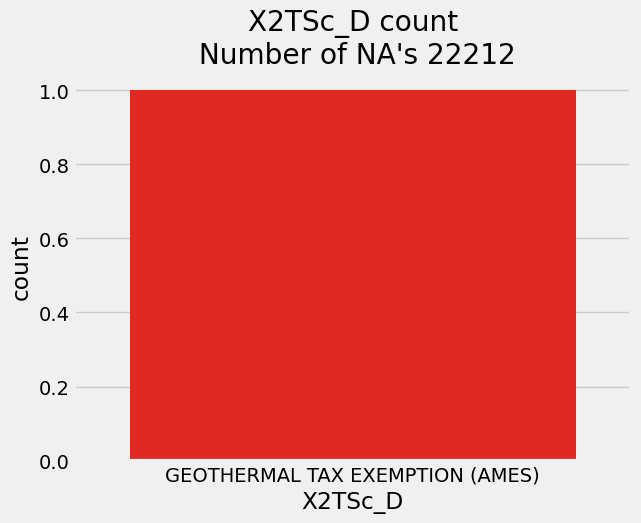

X1TPr_S has 30 unique values
 Number of NA's 21522
X1TSc_S has 29 unique values
 Number of NA's 21522


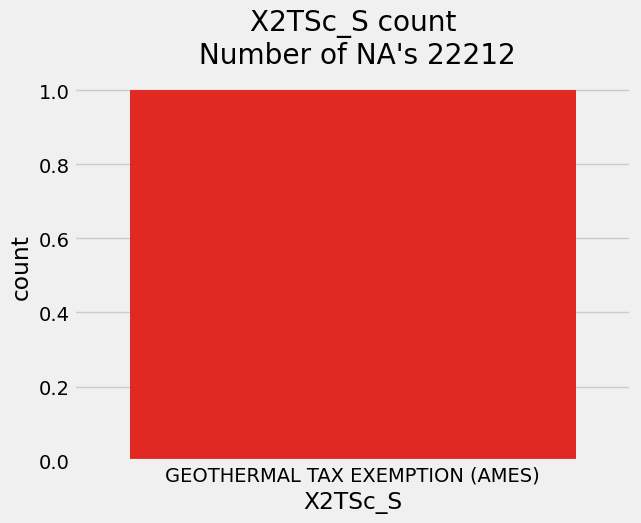

Neighborhood has 38 unique values
 Number of NA's 4308


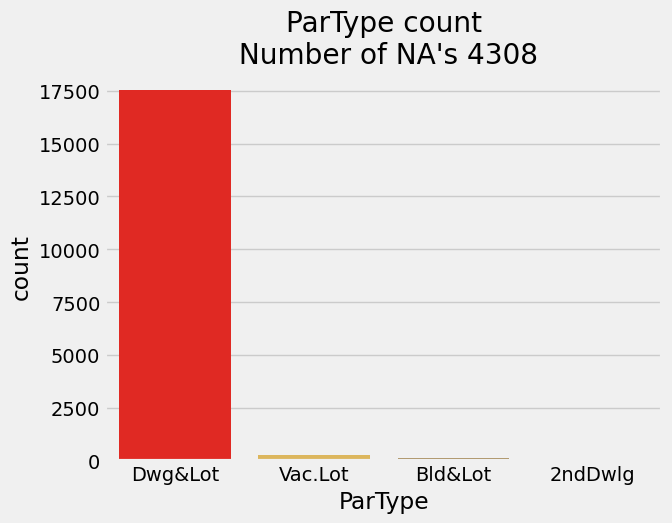

BldgType has 10 unique values
 Number of NA's 4308
HouseStyle has 11 unique values
 Number of NA's 4308


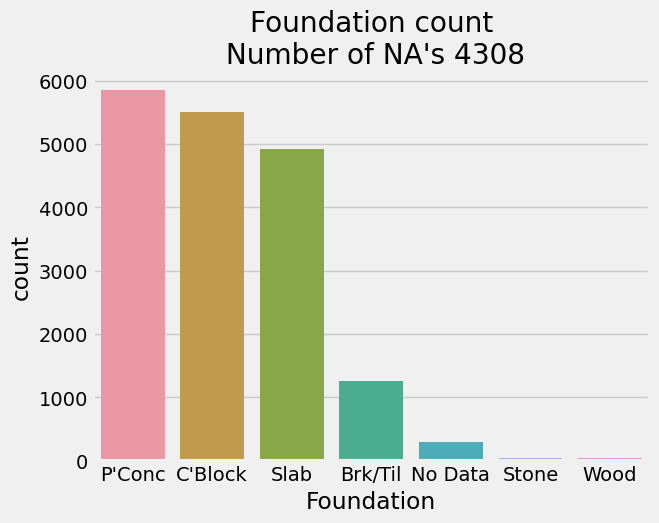

RoofMatl has 11 unique values
 Number of NA's 4308
Ext1 has 19 unique values
 Number of NA's 4308
Ext2 has 19 unique values
 Number of NA's 4308


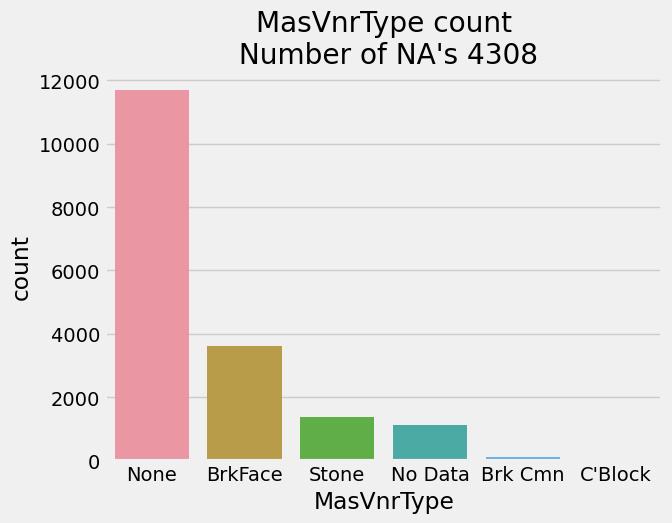

Heating has 15 unique values
 Number of NA's 4308


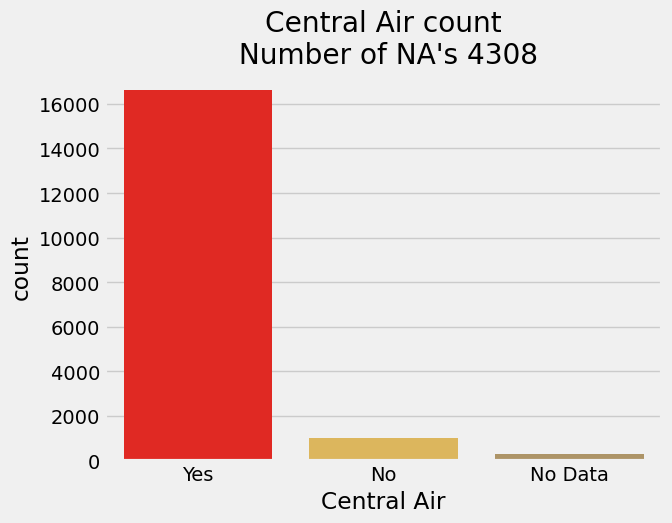

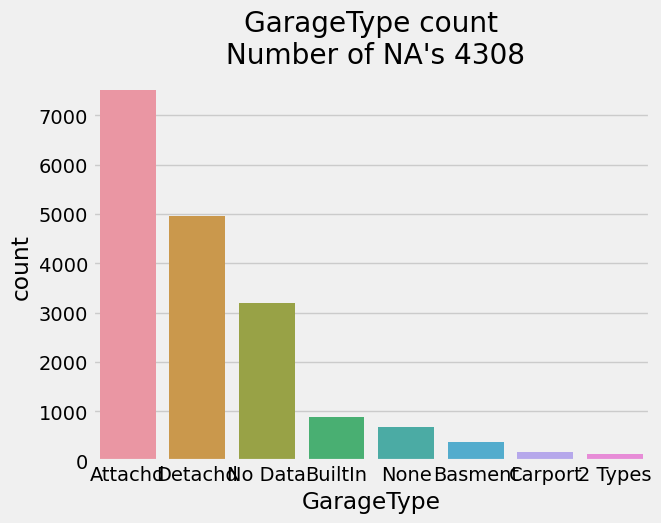

SaleType has 11 unique values
 Number of NA's 19247


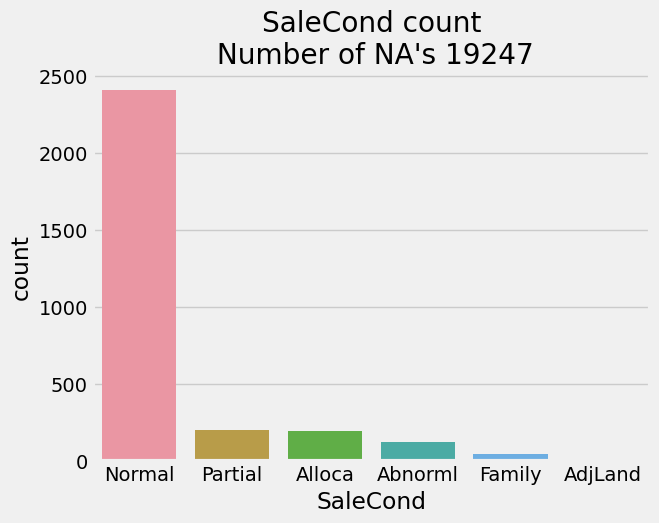

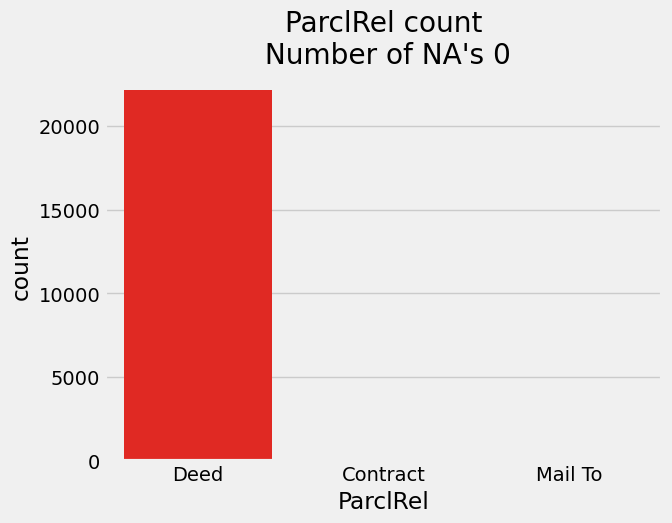

PA-Nmbr has 3941 unique values
 Number of NA's 20


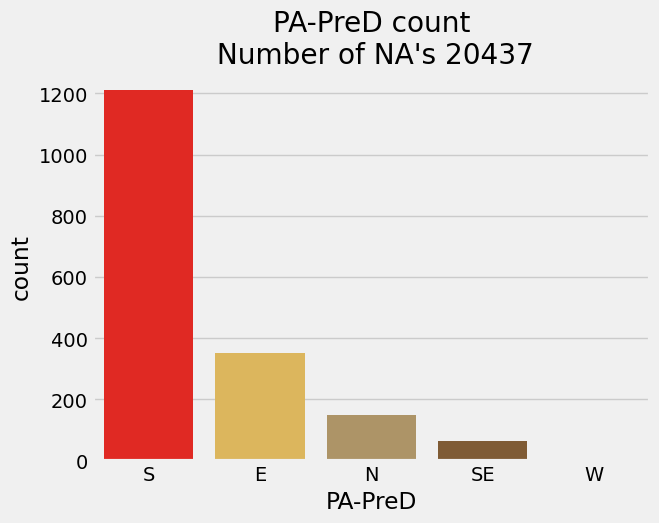

PA-Strt has 549 unique values
 Number of NA's 20
PA-StSfx has 15 unique values
 Number of NA's 98
PA-UnTyp has 14 unique values
 Number of NA's 14468
PA-UntNo has 1364 unique values
 Number of NA's 14096


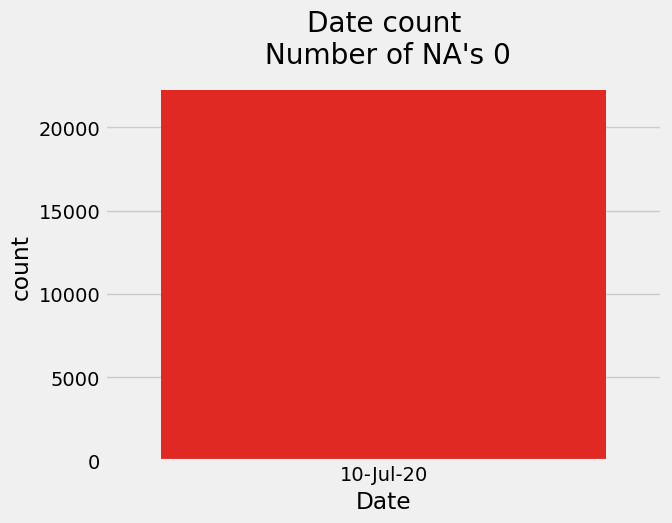

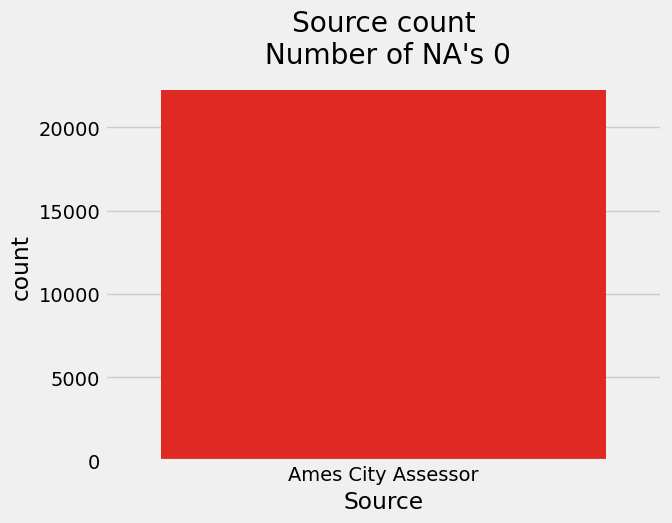

In [8]:
for cat_feat in categorical_features:
    num_cat_feats = len(location[cat_feat].unique())
    if num_cat_feats<10:
        g = sns.countplot(x=cat_feat, data=location,
                          order = location[cat_feat].value_counts().index)
        plt.title(f"{cat_feat} count\n Number of NA's {location[cat_feat].isnull().sum(axis = 0)}")
        plt.show()
    else:
        print(f"{cat_feat} has {num_cat_feats} unique values\n Number of NA's {location[cat_feat].isnull().sum(axis = 0)}")

MapRefNo


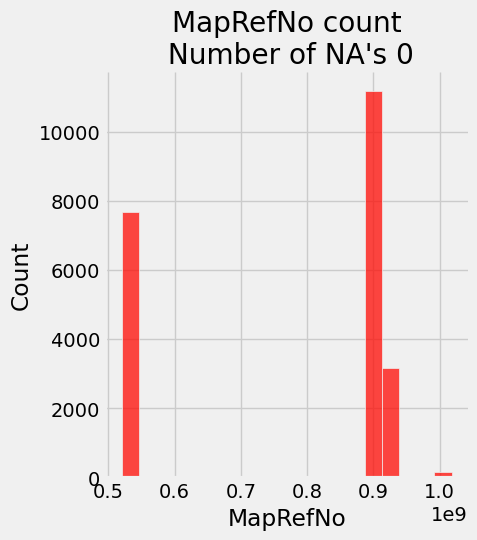

GeoRefNo


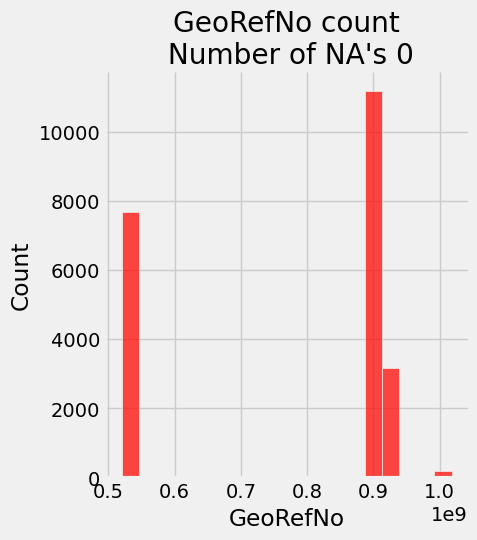

Tier


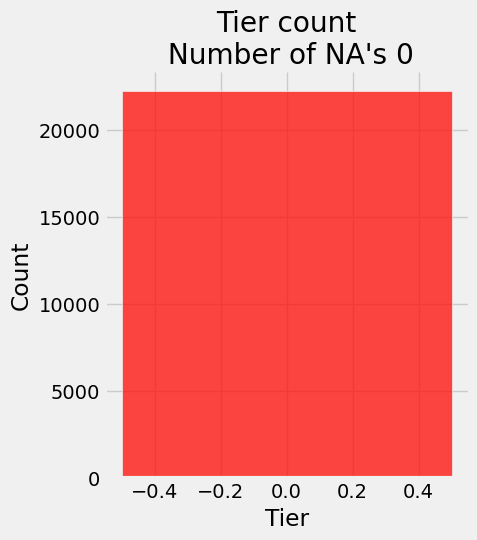

Range


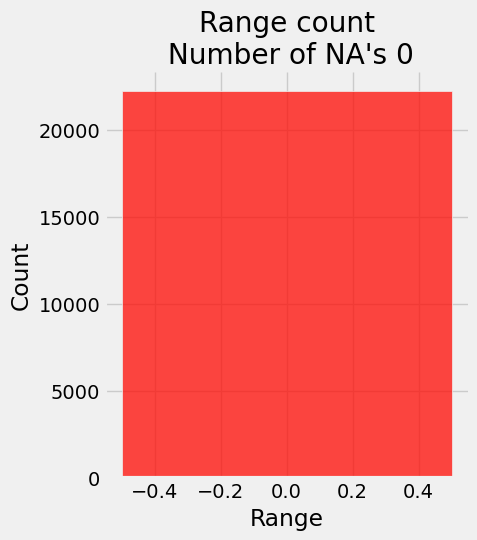

SchD_S


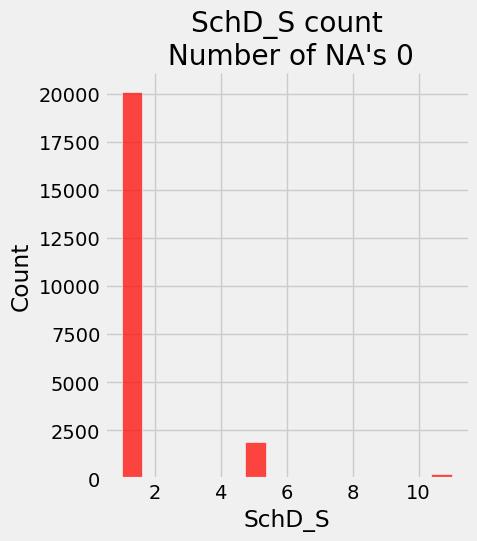

TxD_S


KeyboardInterrupt: 

In [9]:
for num_feat in numerical_features:
    print(num_feat)
    g = sns.displot(x=num_feat, data=location,
                      )
    plt.title(f"{num_feat} count\n Number of NA's {location[num_feat].isnull().sum(axis = 0)}")
    plt.show()


In [ ]:
1+1

In [10]:
location.MA_Zip1.unique()

array([50010., 50023., 50263., 50219., 50014., 50036., 50011., 50325.,
       51455., 77219.,    nan, 87111., 50265., 52761., 78681., 28443.,
       52172., 10024., 68154., 52544., 94945., 50131., 50035., 50201.,
       65742., 66221., 50472., 52211., 52207., 52064., 27540., 65079.,
       81201., 60047., 92128., 50501., 50312., 55407., 52302., 50583.,
       50021., 55346., 50122., 52402., 50321., 10025., 50130., 50051.,
       50134., 50211., 52241., 33411., 57104., 59911., 50105., 50247.,
       98006., 95501., 68179., 85395., 66210., 50476., 52327., 95035.,
       51401., 50100., 66224., 60404., 50548., 50124., 13350., 60014.,
       50129.,  8837., 55164., 50613., 50266., 50046., 94595., 75115.,
       50438., 68123., 80134., 50236., 92374., 90275., 50006., 50226.,
       52405., 93117., 61254., 93013., 50317., 51106., 94306., 33547.,
       51006., 51529., 52060., 56308., 29681., 50170., 52404., 52351.,
       50313., 32952., 51301., 95382., 50248., 55427., 50401., 60645.,
      

In [ ]:
useless = ['Source']